# Making conceptual figures for climate, etc.

In [1]:
## We need to add the module path to our system path so 
## so that our notebook can find our local objects and code:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
     
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from math import exp
import seaborn as sns
import sys
import glob
from dateutil.relativedelta import *
from numpy.random import exponential, uniform
import scipy.stats as st

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel
from farm.functions import *

# set background color
plot.rc['figure.facecolor'] = 'white'

# Uncomment for black background figure
plt.rcParams.update({
    "grid.color": "white",
    'hatch.color': 'k',
    "lines.color": "white",
    "patch.edgecolor": "white",
    'patch.facecolor': ([0, 1, 1]),
    'grid.alpha': 0.4,
    "text.color": "lightgray",
    "axes.facecolor": "black",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

In [2]:
# Generate a climate object to get alphas and lambdas
s0_climate = Climate(station='JACOBSON FARM', data_file='../data/CETRAD/CETRAD_rainfall.csv', interval='dekad')

# maybe get min and max from here
np.unique(s0_climate.alpha_r)
np.unique(s0_climate.lambda_r)

array([0.11585366, 0.12926829, 0.13170732, 0.14092141, 0.14512195,
       0.14567901, 0.14634146, 0.14814815, 0.15925926, 0.16666667,
       0.16790123, 0.17037037, 0.17037037, 0.17160494, 0.17901235,
       0.18024691, 0.18888889, 0.20493827, 0.20576132, 0.20617284,
       0.21111111, 0.21111111, 0.22222222, 0.24156379, 0.27777778,
       0.30617284, 0.31358025, 0.31481481, 0.39135802, 0.40987654,
       0.41234568, 0.42469136, 0.44320988, 0.47530864, 0.48395062,
       0.49012346, 0.49259259])

(50, 450)

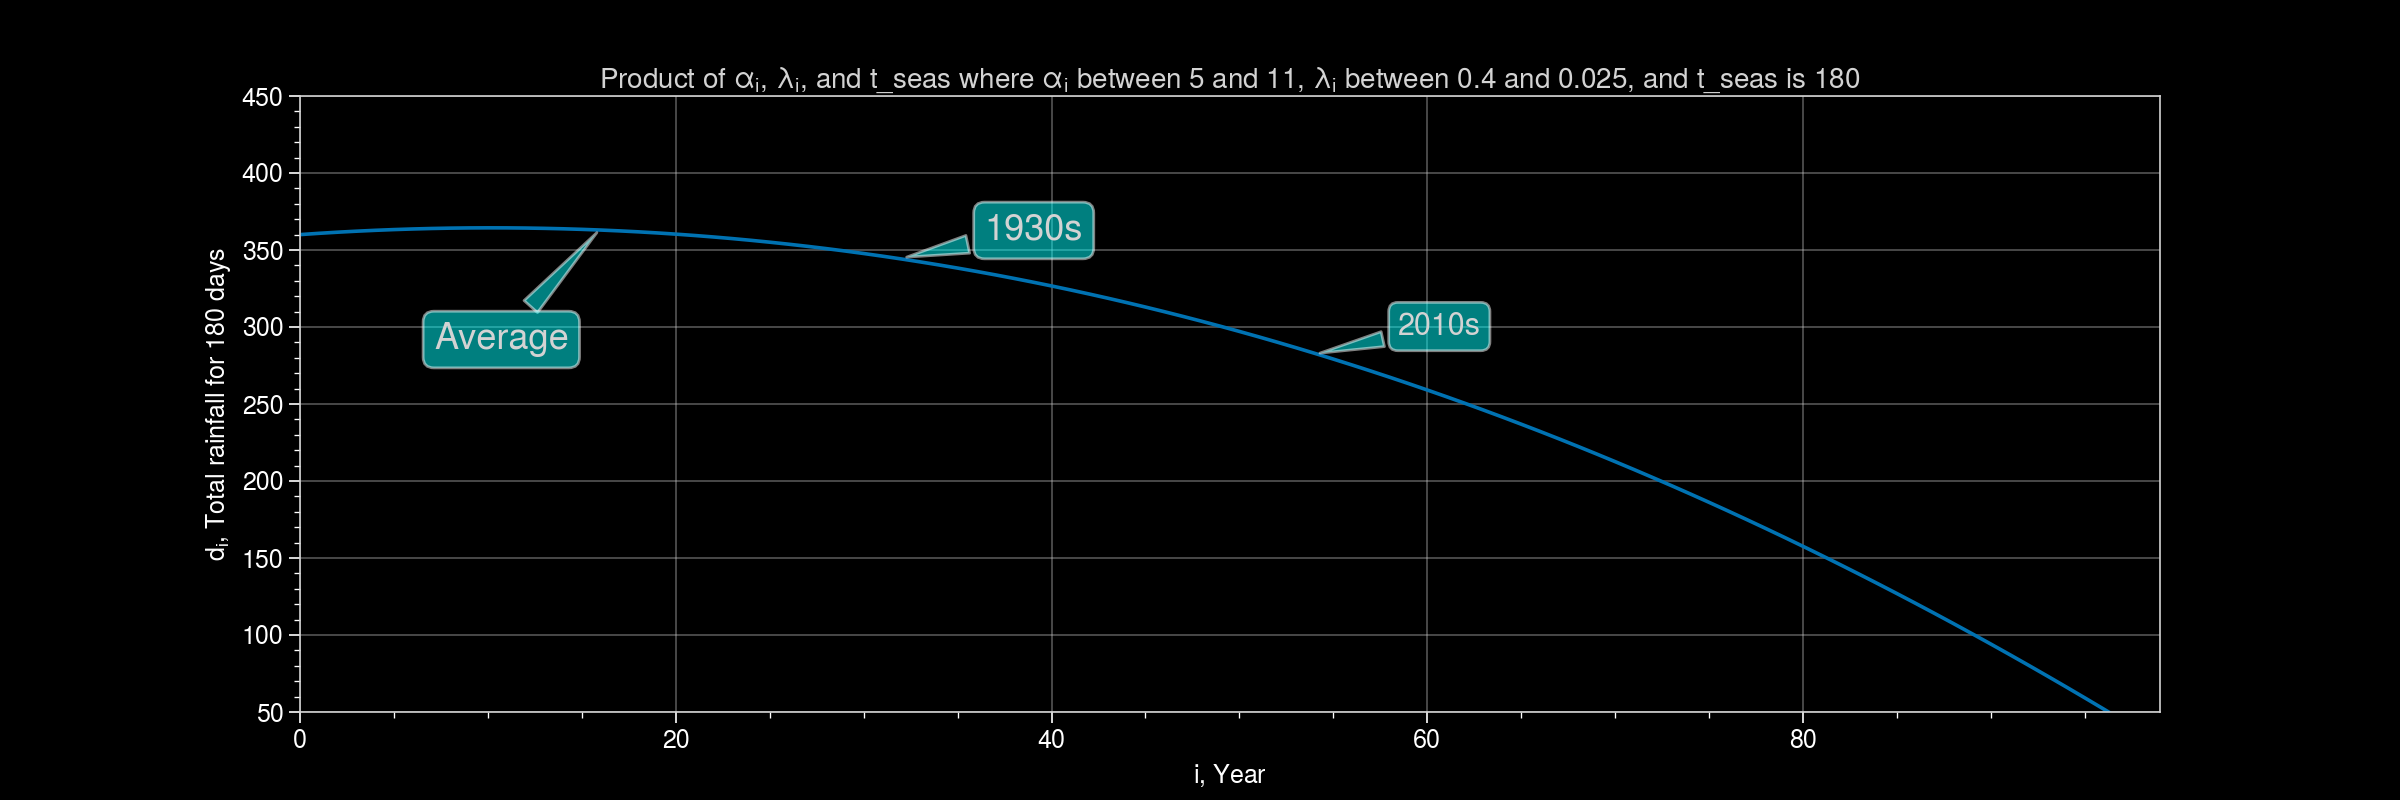

In [8]:
# open question: where's the best place to get these values?
alphas = np.linspace(5,11,100)
lambdas = np.linspace(0.4,.015,100)
t_seas = 180

rainfall = pd.DataFrame(alphas*lambdas*t_seas)

fig, ax = plt.subplots(figsize=(12, 4))

rainfall.plot(ax=ax, label='Total rainfall (mm)')
plt.ylabel('$d_i$, Total rainfall for 180 days')
plt.xlabel('$i$, Year')
plt.title(r'Product of $\alpha_i$, $\lambda_i$, and t_seas where $\alpha_i$ between 5 and 11, $\lambda_i$ between 0.4 and 0.025, and t_seas is 180')

# Can plot where on this curve different seasons fall. 
# Based on three eras:
e = 180*5.318634*0.359992 # Early: 1930s 
m = 180*7.965385*0.253879 # Middle: 1970s (Avg)
l = 180*10.612137*0.147766 # Late: 2010s
style = dict(size=10, color='gray')

#ax.legend(rainfall, 'Total rainfall (mm)')
ax.get_legend().remove()

alpha = 0.5 

# Having way too much fun with arrows: 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax.annotate('1930s', xy=(32, e),  xycoords='data',
             xytext=(30, 10), textcoords='offset points',
             size=13, ha='left', va="center",
             bbox=dict(boxstyle="round", alpha=alpha),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha));


ax.annotate('Average', xy=(16, m),  xycoords='data',
             xytext=(-60, -40), textcoords='offset points',
             size=13, ha='left', va="center",
             bbox=dict(boxstyle="round", alpha=alpha),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha));

ax.annotate('2010s', xy=(54, l),  xycoords='data',
             xytext=(30, 10), textcoords='offset points',
             size=11, ha='left', va="center",
             bbox=dict(boxstyle="round", alpha=alpha),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=alpha));

plt.ylim(50, 450)

# Let's play around with different stations

What is this actually showing us..
1. Takes the alphas and lambdas from the historical record for each dekad 
2. Then take the mininum and maximum from those which is basically the dry season and weat season dekad value
3. Get evenly spaced numbers between the min and max values (100 values)
4. Multiple alpha values, lambda values, and length of season (180) to get the seasonal rainfall

In [53]:
# Generate a climate object to get alphas and lambdas
s0_climate = Climate(station='JACOBSON FARM', data_file='../data/CETRAD/CETRAD_rainfall.csv', interval='dekad')

short_list = ['ARCHERS POST','NANYUKI FOREST STN','NARO MORU FOREST STN','OL JOGI FARM', 'OL PEJETA FARM']


climates = []

for i in short_list:
    s0_climate = Climate(station=i, data_file='../data/CETRAD/CETRAD_rainfall.csv', interval='dekad')
    
    a_min = s0_climate.alpha_r.min()
    a_max = s0_climate.alpha_r.max()
    l_min = s0_climate.lambda_r.min()
    l_max = s0_climate.lambda_r.max()
    
    climates.append([i, a_min, a_max, l_min, l_max])

df = pd.DataFrame(climates, columns=["station", "a_min", "a_max", "l_min", "l_max"])

In [54]:
s0_climate.alpha_r

array([ 8.08435294,  8.08435294,  8.08435294,  8.08435294,  8.08435294,
        8.08435294,  8.08435294,  8.08435294,  8.08435294,  8.08435294,
        9.61811587,  9.61811587,  9.61811587,  9.61811587,  9.61811587,
        9.61811587,  9.61811587,  9.61811587,  9.61811587,  9.61811587,
        8.46807839,  8.46807839,  8.46807839,  8.46807839,  8.46807839,
        8.46807839,  8.46807839,  8.46807839,  8.46807839,  8.46807839,
       10.52668081, 10.52668081, 10.52668081, 10.52668081, 10.52668081,
       10.52668081, 10.52668081, 10.52668081, 10.52668081, 10.52668081,
        9.43324532,  9.43324532,  9.43324532,  9.43324532,  9.43324532,
        9.43324532,  9.43324532,  9.43324532,  9.43324532,  9.43324532,
        8.53954808,  8.53954808,  8.53954808,  8.53954808,  8.53954808,
        8.53954808,  8.53954808,  8.53954808,  8.53954808,  8.53954808,
        9.54832942,  9.54832942,  9.54832942,  9.54832942,  9.54832942,
        9.54832942,  9.54832942,  9.54832942,  9.54832942,  9.54

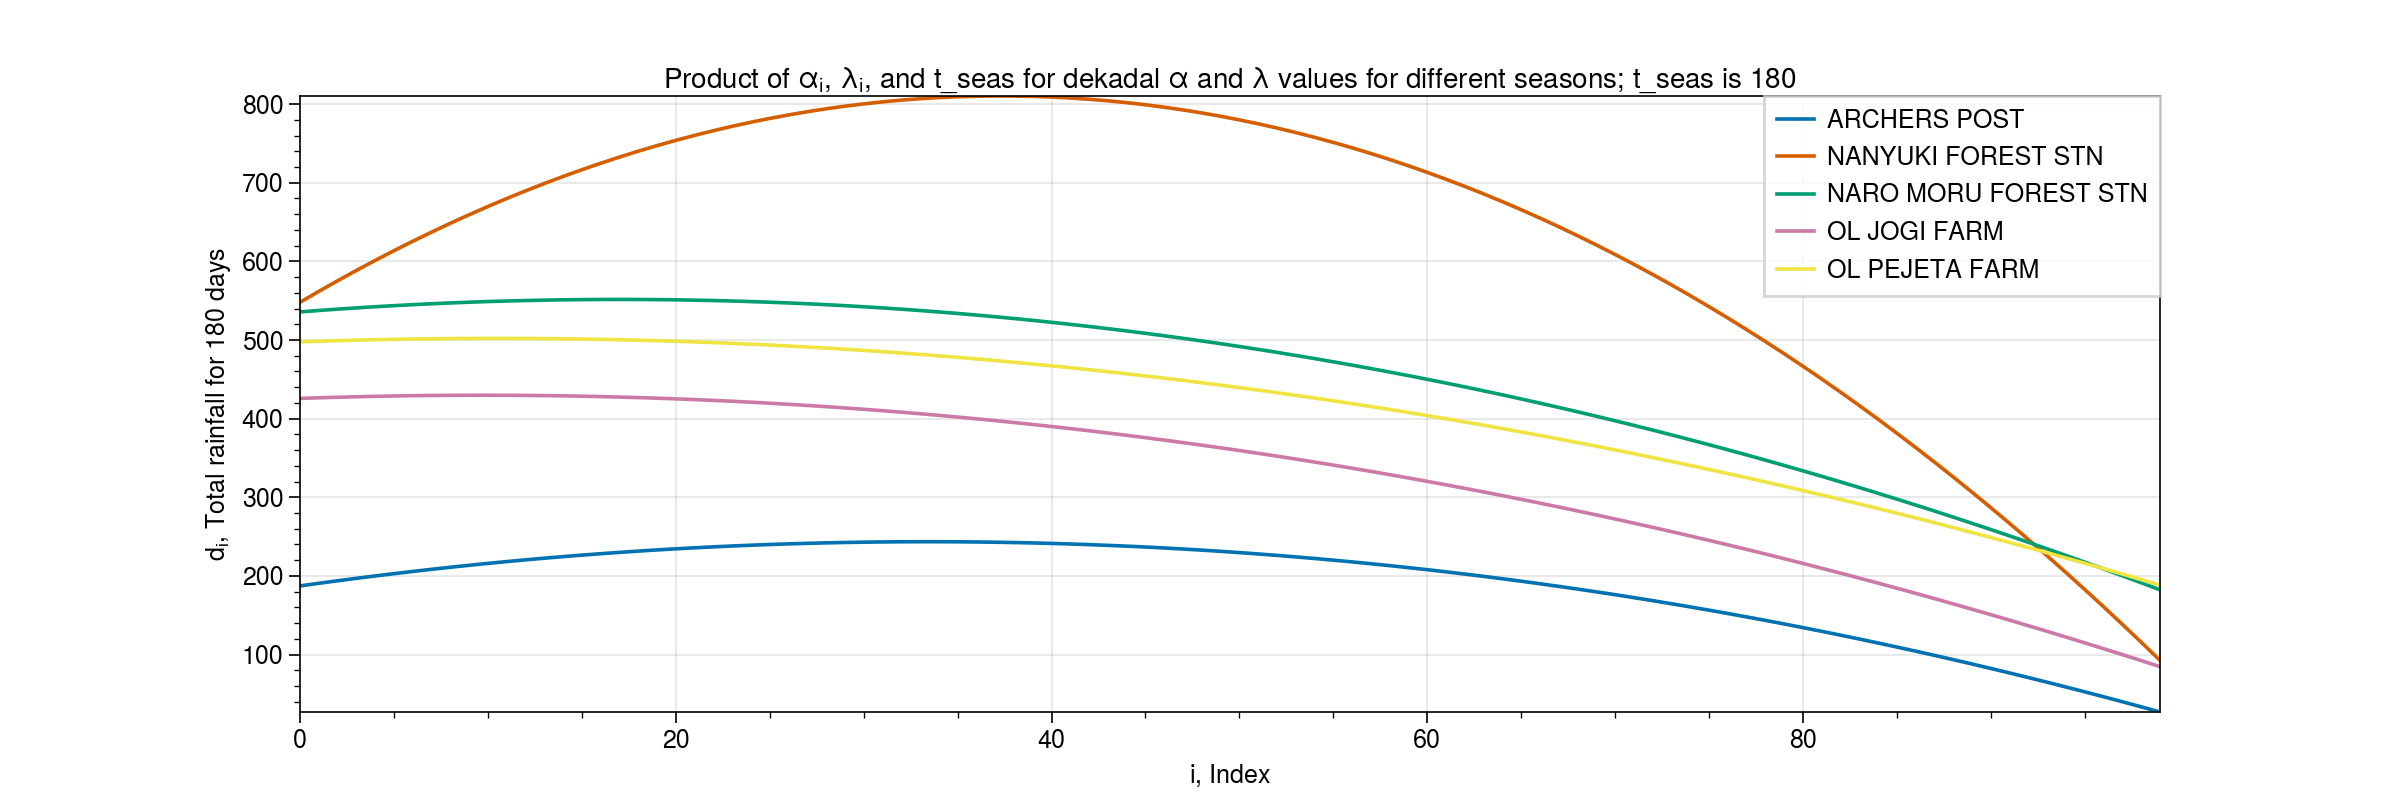

In [77]:
# Turn values into np.array 
orig = pd.DataFrame(np.array(df), index=short_list,
                    columns=['site','a_min', 'a_max','l_min','l_max']).rename_axis('site').drop('site', axis=1)

z = 180

# use list comprehension followed by transpose of rows/columns and rename columns
final_df = (pd.DataFrame([np.linspace(orig.loc[s, 'a_min'], orig.loc[s, 'a_max'],100) *
                          np.linspace(orig.loc[s, 'l_max'], orig.loc[s, 'l_min'],100) * z
                                  for s in orig.index.values])
              .transpose()
              .set_axis(orig.index.values, axis='columns', inplace=False)
           )

# check that this is number of stations (cols) by number of values (rows)
final_df.shape          

final_df.head(100)

# Now plot each column as a seperate line
fig, ax = plt.subplots(figsize=(12, 4))

final_df.plot(ax=ax, label='Total rainfall (mm)') # , cmap='cool'; see here: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

plt.ylabel('$d_i$, Total rainfall for 180 days')
plt.xlabel('$i$, Index')
plt.title(r'Product of $\alpha_i$, $\lambda_i$, and t_seas for dekadal $\alpha$ and $\lambda$ values for different seasons; t_seas is 180')

style = dict(size=10, color='gray')


In [ ]:
# If I want to add arrows back in use this:


#ax.legend(rainfall, 'Total rainfall (mm)')
#ax.get_legend().remove()

# Having way too much fun with arrows: 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
# ax.annotate('1930s', xy=(75, e),  xycoords='data',
#              xytext=(30, 10), textcoords='offset points',
#              size=13, ha='left', va="center",
#              bbox=dict(boxstyle="round", alpha=0.1),
#              arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


# ax.annotate('Average', xy=(90, m),  xycoords='data',
#              xytext=(-6, -10), textcoords='offset points',
#              size=13, ha='left', va="center",
#              bbox=dict(boxstyle="round", alpha=0.1),
#              arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# ax.annotate('2010s', xy=(58, l),  xycoords='data',
#              xytext=(30, 10), textcoords='offset points',
#              size=11, ha='left', va="center",
#              bbox=dict(boxstyle="round", alpha=0.1),
#              arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

#plt.ylim(0, 850)
